# IMPORTING NECESSARY MODULES 

In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import string
import re
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading the data set

In [2]:
url = "https://raw.githubusercontent.com/aswintechguy/Machine-Learning-Projects/master/Twitter%20Sentiment%20Analysis%20-%20NLP/Twitter%20Sentiments.csv"
df = pd.read_csv(url)
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Preprocessing the data set

In [4]:
def remove_pattern(input_txt,pattern ):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word,"",input_txt)
    return input_txt    

In [5]:
# removing the @user
df['tweet_'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*") 

In [6]:
df.head()

,id,label,tweet,tweet_
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [7]:
# removing the special characters e.g  { ; : . , ' " ( ) * - + etc}
df['tweet_'] = df['tweet_'].str.replace("[^a-zA-Z#]", " ")

In [8]:
df.head()

,id,label,tweet,tweet_
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [9]:
# removing the short words
df['tweet_'] = df['tweet_'].apply(lambda x : " ".join([ w for w in x.split() if len(w)> 3]))

In [10]:
df.head()

,id,label,tweet,tweet_
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [11]:
# tokenization of each individua tweets
token_tweets = df['tweet_'].apply(lambda x : x.split())

In [12]:
token_tweets.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tweet_, dtype: object

In [13]:
#steming the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
token_tweets = token_tweets.apply(lambda sentence:  [stemmer.stem(word) for word in sentence])
token_tweets.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tweet_, dtype: object

In [14]:
# combining the tokenized tweets back to sentence
for i in range(len(token_tweets)):
    token_tweets[i] = " ".join(token_tweets[i])
token_tweets.head()   

0    when father dysfunct selfish drag kid into dys...
1    thank #lyft credit caus they offer wheelchair ...
2                                  bihday your majesti
3                           #model love take with time
4                             factsguid societi #motiv
Name: tweet_, dtype: object

In [15]:
df['tweet_'] = token_tweets

In [16]:
df.head()

,id,label,tweet,tweet_
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# Exploratory Data Analysis

In [17]:
# !pip install wordcloud

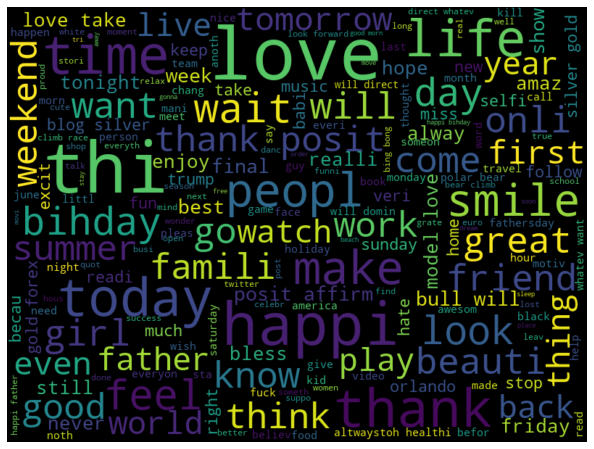

In [18]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['tweet_']])

from wordcloud import WordCloud
wc = WordCloud(width= 800, height = 600, max_font_size= 100, random_state = 42)
wcloudimage = wc.generate(all_words)
plt.figure(figsize=  (15,8))
plt.imshow(wcloudimage, interpolation= 'bilinear')
plt.axis('off')
plt.show()

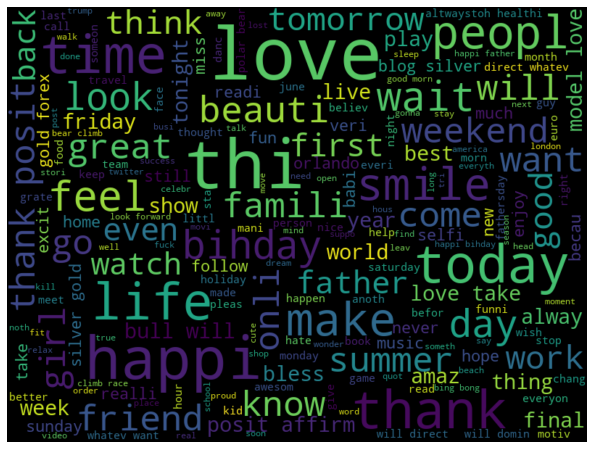

In [19]:
# visualize the frequent +ve words
all_words = " ".join([sentence for sentence in df['tweet_'][df['label']==0]])
wc = WordCloud(width= 800, height = 600, max_font_size= 100, random_state = 42)
wcloudimage = wc.generate(all_words)
plt.figure(figsize=  (15,8))
plt.imshow(wcloudimage, interpolation= 'bilinear')
plt.axis('off')
plt.show()

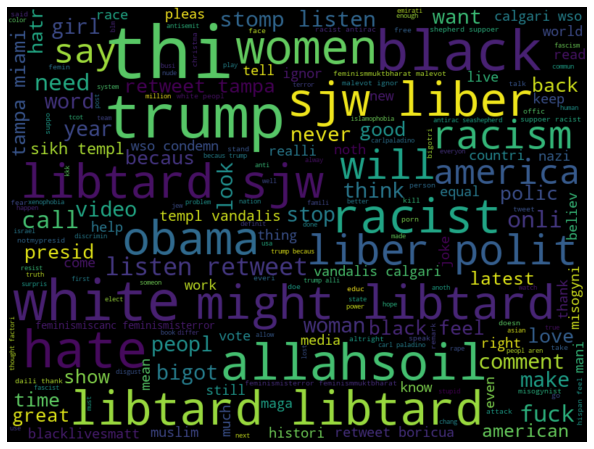

In [20]:
# visualize the frequent -ve words
all_words = " ".join([sentence for sentence in df['tweet_'][df['label']==1]])
wc = WordCloud(width= 800, height = 600, max_font_size= 100, random_state = 42)
wcloudimage = wc.generate(all_words)
plt.figure(figsize=  (15,8))
plt.imshow(wcloudimage, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [21]:
# extracting the #tags
def extract_hashtag(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags    

In [22]:
positive_hashtags = extract_hashtag(df['tweet_'][df['label'] == 0])
negative_hashtags = extract_hashtag(df['tweet_'][df['label'] == 1])

In [23]:
positive_hashtags = sum(positive_hashtags, [])  

In [24]:
negative_hashtags = sum(negative_hashtags, [])

In [25]:
positive_hashtags[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [26]:
freq = nltk.FreqDist(positive_hashtags)
d = pd.DataFrame({"Hashtag": list(freq.keys()),
                  "Count" : list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


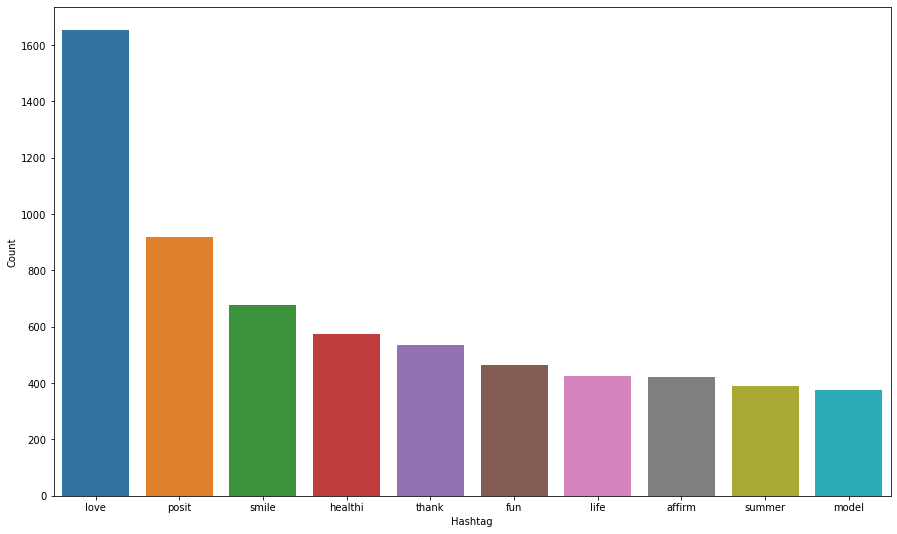

In [27]:
# visualizing the top 10 +ve hashtags
d = d.nlargest(columns='Count', n= 10)
plt.figure(figsize= (15, 9))
sns.barplot(x = 'Hashtag', y = 'Count', data = d)
plt.show()

In [28]:
#visualizing the top 10 negative hashtags
freq = nltk.FreqDist(negative_hashtags)
d = pd.DataFrame({"Hashtag": list(freq.keys()),
                  "Count" : list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


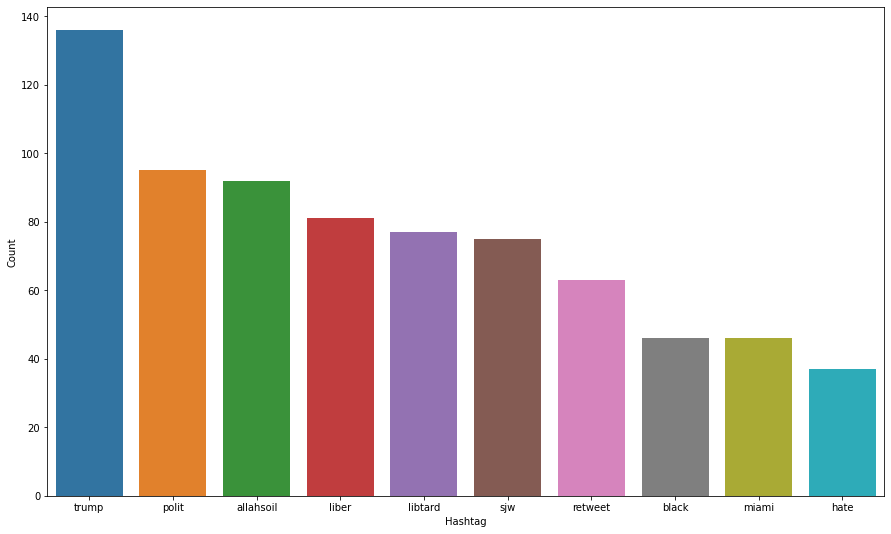

In [29]:
d = d.nlargest(columns='Count', n= 10)
plt.figure(figsize= (15, 9))
sns.barplot(x = 'Hashtag', y = 'Count', data = d)
plt.show()

# Feature Extraction for NLP

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
bow_vec  = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english', max_features=1000)
bow_ = bow_vec.fit_transform(df['tweet_'])

In [31]:
bow_.shape

(31962, 1000)

# Input Split

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bow_, np.array(df['label']), test_size  = 0.20 , random_state = 42)

In [33]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(25569, 1000) (6393, 1000) (25569,) (6393,)


# Model Preparation and Prediction

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [35]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [36]:
pred = model.predict(x_test)

In [37]:
f1_score(y_test, pred)

0.4714946070878275

In [38]:
accuracy_score(y_test, pred)

0.9463475676521195